Data Loading and EDA

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

Load Data 


In [3]:
columns = [
    'Status', 'Duration', 'History', 'Purpose', 'Amount', 
    'Savings', 'Employment', 'InstallmentRate', 'PersonalStatus', 
    'OtherDebtors', 'ResidenceSince', 'Property', 'Age', 
    'OtherInstallments', 'Housing', 'ExistingCredits', 'Job', 
    'LiablePeople', 'Telephone', 'ForeignWorker', 'Target'
]

In [4]:
df =  pd.read_csv('german.data' , sep=' ' ,names=columns , header = None)

In [5]:
print(f"Data Loaded! Shape: {df.shape}")

Data Loaded! Shape: (1000, 21)


In [6]:
df['Target'] = df['Target'].map({1:0 ,2:1})

In [7]:
print(df.head())

  Status  Duration History Purpose  Amount Savings Employment  \
0    A11         6     A34     A43    1169     A65        A75   
1    A12        48     A32     A43    5951     A61        A73   
2    A14        12     A34     A46    2096     A61        A74   
3    A11        42     A32     A42    7882     A61        A74   
4    A11        24     A33     A40    4870     A61        A73   

   InstallmentRate PersonalStatus OtherDebtors  ...  Property Age  \
0                4            A93         A101  ...      A121  67   
1                2            A92         A101  ...      A121  22   
2                2            A93         A101  ...      A121  49   
3                2            A93         A103  ...      A122  45   
4                3            A93         A101  ...      A124  53   

   OtherInstallments Housing ExistingCredits   Job LiablePeople  Telephone  \
0               A143    A152               2  A173            1       A192   
1               A143    A152          

In [8]:
print("\n--- Target Distribution(0=Safe , 1=Risk)---")


--- Target Distribution(0=Safe , 1=Risk)---


In [9]:
print(df['Target'].value_counts())


Target
0    700
1    300
Name: count, dtype: int64


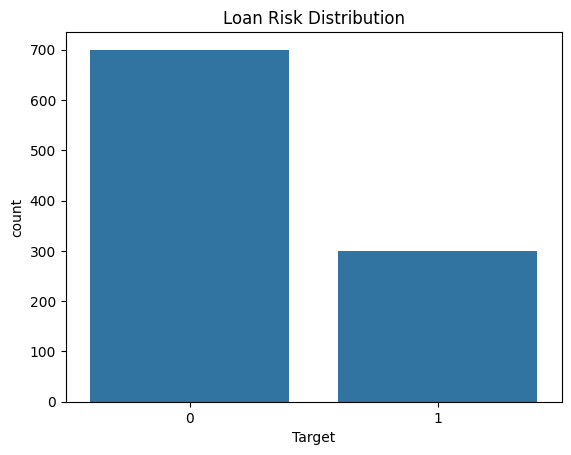

In [10]:
sns.countplot(x=df['Target'])
plt.title("Loan Risk Distribution")
plt.show()


--- Checking Gender/Personal Status (Potential Bias) ---


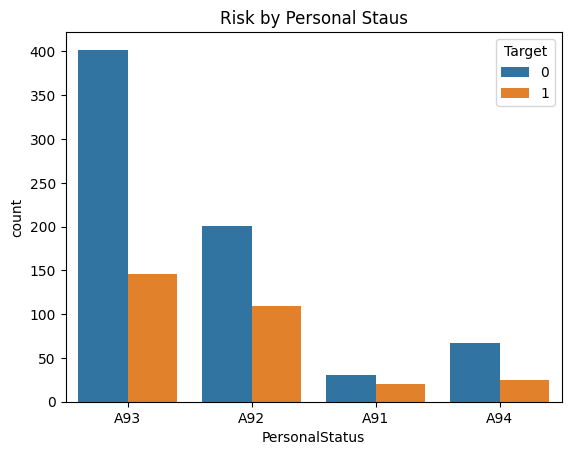

In [11]:
print("\n--- Checking Gender/Personal Status (Potential Bias) ---")
sns.countplot(x='PersonalStatus' , hue='Target' ,data =  df)
plt.title("Risk by Personal Staus")
plt.show()

In [12]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Status', 'History', 'Purpose', 'Savings', 'Employment',
       'PersonalStatus', 'OtherDebtors', 'Property', 'OtherInstallments',
       'Housing', 'Job', 'Telephone', 'ForeignWorker'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

BaseLine Modeling


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X =  df.drop('Target' , axis  =  1)
y =  df['Target']

In [16]:
X_train ,  X_test , y_train ,y_test =  train_test_split(
    X,y, test_size=0.2 , random_state=42 ,stratify=y
)

stratify =  class imbalance pserve

In [17]:
print(X_train.shape,X_test.shape)

(800, 20) (200, 20)


Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

Logistic Regression(Baseline Model)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


predictions

In [20]:
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:,1]

Evaluation Metrics

In [21]:
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    roc_auc_score

)
print("Confusion Matrix")
print(confusion_matrix(y_test , y_pred))

print("\nClassification Report:")
print(classification_report(y_pred,y_test))

print("ROC-AUC Score:",roc_auc_score(y_test , y_proba))

Confusion Matrix
[[121  19]
 [ 28  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       149
           1       0.53      0.63      0.58        51

    accuracy                           0.77       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.78      0.77      0.77       200

ROC-AUC Score: 0.7904761904761904


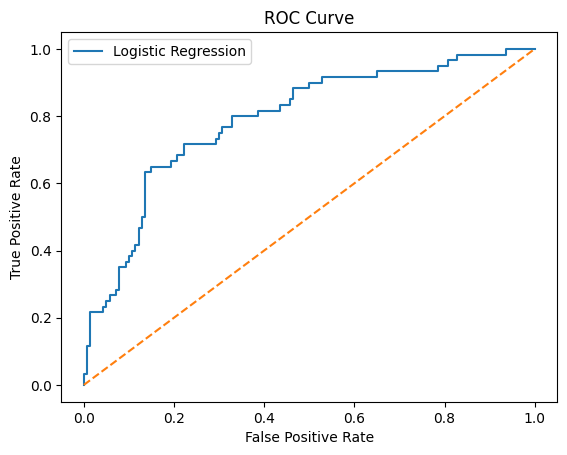

In [22]:
from sklearn.metrics import roc_curve
fpr , tpr , _ = roc_curve(y_test,y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , roc_auc_score
rf =  RandomForestClassifier(
    n_estimators = 200,
    random_state =  42,
    class_weight = 'balanced'
)
rf.fit(X_train ,y_train)
y_pred_rf =   rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]
print(classification_report(y_test , y_pred_rf))
print("ROC-AUC:",roc_auc_score(y_test,y_proba_rf))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       140
           1       0.71      0.40      0.51        60

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200

ROC-AUC: 0.800297619047619


In [24]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=42)
X_train_sm ,y_train_sm = smote.fit_resample(X_train,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

Target
0    560
1    240
Name: count, dtype: int64
Target
1    560
0    560
Name: count, dtype: int64


In [26]:
rf_smote =  RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf_smote.fit(X_train_sm,y_train_sm)
y_pred_sm = rf_smote.predict(X_test)
y_proba_sm = rf_smote.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_sm))
print("ROC-AUC:",roc_auc_score(y_test,y_proba_sm))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       140
           1       0.62      0.53      0.57        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200

ROC-AUC: 0.7986309523809524


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [200,300],
    'max_depth' : [None, 10,20],
    'min_samples_split' :[2,5],
    'min_samples_leaf' : [1,2]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv = 5,
    scoring='recall',
    n_jobs=-1
)
grid.fit(X_train_sm,y_train_sm)
print("best params:",grid.best_params_)

best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
best_rf =  grid.best_estimator_
y_pred_best =  best_rf.predict(X_test)
y_proba_best =  best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred_best))
print("ROC-AUC:",roc_auc_score(y_test,y_proba_best))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.60      0.57      0.58        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.75      0.76      0.75       200

ROC-AUC: 0.7951190476190476


In [29]:
from sklearn.ensemble import IsolationForest
iso =  IsolationForest(
    n_estimators=200,
    contamination=0.1,
    random_state=42
)
iso.fit(X_train)
train_anomaly =  iso.predict(X_train)
test_anomaly = iso.predict(X_test)

In [30]:
import numpy as np
test_anomaly_label = np.where(test_anomaly == -1,1,0)

1 =  anomaly , 0 = normal

In [31]:
pd.crosstab(test_anomaly_label,y_test,
            rownames = ['Anomaly'],
            colnames=['Actual Risk'])

Actual Risk,0,1
Anomaly,,
0,128,53
1,12,7


In [32]:
from sklearn.svm import OneClassSVM
ocsvm =  OneClassSVM(
    kernel='rbf',
    nu=0.1,
    gamma='scale'
)
ocsvm.fit(X_train_scaled)
svm_anomaly = ocsvm.predict(X_test_scaled)
svm_anomaly_label = np.where(svm_anomaly == -1,1,0)

In [33]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
X_train_df = pd.DataFrame(
    X_train.values,
    columns=X_train.columns
)

c:\Users\sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 1583/1600 [00:53<00:00]        

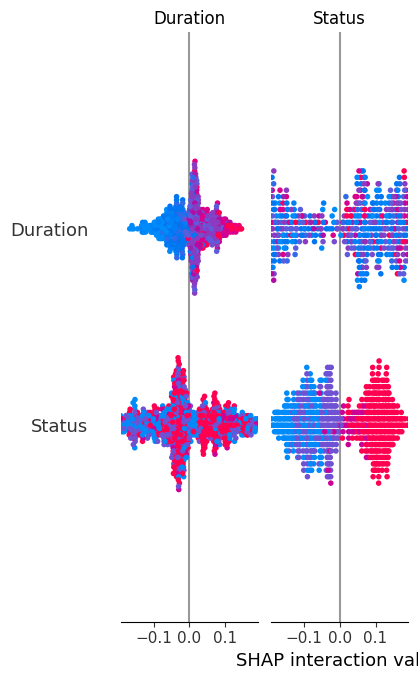

In [35]:
import shap
explainer =  shap.TreeExplainer(rf,X_train_df)

shap_values =  explainer(X_train_df)
shap.summary_plot(shap_values.values , X_train_df)

In [36]:
y_pred = y_pred_rf
y_true =  y_test
fair_df = X_test.copy()
fair_df['y_true'] = y_true.values
fair_df['y_pred'] = y_pred

In [37]:
sensitive_attr = 'PersonalStatus'
fair_df[sensitive_attr].value_counts()

PersonalStatus
2    118
1     61
3     12
0      9
Name: count, dtype: int64

In [38]:
dp = fair_df.groupby(sensitive_attr)['y_pred'].mean()
print("Demographic Parity (Predicted Risk Rate):")
print(dp)

Demographic Parity (Predicted Risk Rate):
PersonalStatus
0    0.444444
1    0.163934
2    0.161017
3    0.083333
Name: y_pred, dtype: float64


In [39]:
def true_positive_rate(df):
    tp = ((df['y_pred'] == 1) & (df['y_true'] == 1)).sum()
    fn = ((df['y_pred'] == 0) & (df['y_true'] == 1)).sum()
    return tp / (tp + fn) if (tp + fn) > 0 else 0

eo = fair_df.groupby(sensitive_attr).apply(true_positive_rate)
print("Equal Opportunity (TPR by group):")
print(eo)


Equal Opportunity (TPR by group):
PersonalStatus
0    0.666667
1    0.400000
2    0.382353
3    0.333333
dtype: float64


C:\Users\sohai\AppData\Local\Temp\ipykernel_11228\3006140638.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eo = fair_df.groupby(sensitive_attr).apply(true_positive_rate)


In [40]:
def false_positive_rate(df):
    fp = ((df['y_pred'] == 1) & (df['y_true'] == 0)).sum()
    tn = ((df['y_pred'] == 0) & (df['y_true'] == 0)).sum()
    return fp / (fp + tn) if (fp + tn) > 0 else 0

fpr = fair_df.groupby(sensitive_attr).apply(false_positive_rate)
print("False Positive Rate by group:")
print(fpr)


False Positive Rate by group:
PersonalStatus
0    0.333333
1    0.048780
2    0.071429
3    0.000000
dtype: float64


C:\Users\sohai\AppData\Local\Temp\ipykernel_11228\4127699136.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fpr = fair_df.groupby(sensitive_attr).apply(false_positive_rate)


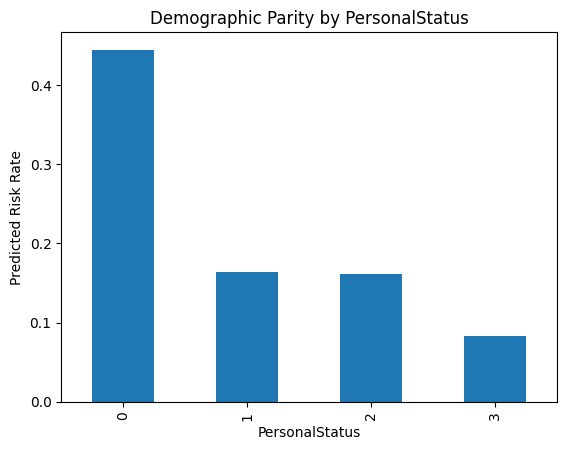

In [41]:
import matplotlib.pyplot as plt

dp.plot(kind='bar', title='Demographic Parity by PersonalStatus')
plt.ylabel("Predicted Risk Rate")
plt.show()


In [42]:
import joblib
joblib.dump(best_rf, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']